<a href="https://colab.research.google.com/github/llukitas/Interbank_Kaggle/blob/master/Recomendacion_restaurant_mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Instalacion de utilitarios Pyspark

#  **03/11/2019**

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.3.4/spark-2.3.4-bin-hadoop2.7.tgz
!tar xf spark-2.3.4-bin-hadoop2.7.tgz

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz


In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"


In [33]:
!pip install pyspark

In [0]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()

# 1. Lectura del origen datos

In [0]:
# Lectura desde un archivo fisico
from google.colab import files
uploaded = files.upload()

In [36]:

# Conexion al drive
#---------------------------
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
ls

drive/                         spark-2.3.4-bin-hadoop2.7.tgz.1
sample_data/                   spark-2.4.4-bin-hadoop2.7/
spark-2.3.4-bin-hadoop2.7/     spark-2.4.4-bin-hadoop2.7.tgz
spark-2.3.4-bin-hadoop2.7.tgz  spark-2.4.4-bin-hadoop2.7.tgz.1


#2.  Cargando los datos en formato Spark

In [38]:
comercio_mex = spark.read.csv('/content/drive/My Drive/AGRARIA_ML/Training R ML en Casos de Negocios/8_Recomendacion_comercio/Comercio_tipo_rappi.csv', sep=';', header=True, inferSchema=True)

# 2.1 Revision de formatos 
comercio_mex.printSchema()

root
 |-- userID: string (nullable = true)
 |-- userID_cod: integer (nullable = true)
 |-- placeID: integer (nullable = true)
 |-- Nombre_comerce: string (nullable = true)
 |-- Distrito: string (nullable = true)
 |-- rating: integer (nullable = true)
 |-- food_rating: integer (nullable = true)
 |-- service_rating: integer (nullable = true)
 |-- rating_total: integer (nullable = true)



In [39]:
# Dimensiona de base
print((comercio_mex.count(),len(comercio_mex.columns)))

(50766, 9)


In [40]:
# 2.2 Revisiones  
comercio_mex.show(5)

+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+
|userID|userID_cod|placeID|      Nombre_comerce|       Distrito|rating|food_rating|service_rating|rating_total|
+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+
| U1077|         1| 135085|Tortas Locas Hipo...|San Luis Potosi|     2|          2|             2|           6|
| U1077|         1| 135038|Restaurant la Cha...|San Luis Potosi|     2|          2|             1|           5|
| U1077|         1| 132825|     puesto de tacos|         s.l.p.|     2|          2|             2|           6|
| U1077|         1| 135060|Restaurante Maris...|San Luis Potosi|     1|          2|             2|           5|
| U1068|         2| 135104|                vips|              0|     1|          1|             2|           4|
+------+----------+-------+--------------------+---------------+------+-----------+--------------+------

In [41]:
#df.filter(df.name.contains('o')).collect()
comercio_mex.filter(comercio_mex.Distrito.contains('San Luis Potosi')).show()

+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+
|userID|userID_cod|placeID|      Nombre_comerce|       Distrito|rating|food_rating|service_rating|rating_total|
+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+
| U1077|         1| 135085|Tortas Locas Hipo...|San Luis Potosi|     2|          2|             2|           6|
| U1077|         1| 135038|Restaurant la Cha...|San Luis Potosi|     2|          2|             1|           5|
| U1077|         1| 135060|Restaurante Maris...|San Luis Potosi|     1|          2|             2|           5|
| U1015|        12| 135071|Restaurante la Ca...|San Luis Potosi|     0|          0|             0|           0|
| U1083|        16| 135034|Michiko Restauran...|San Luis Potosi|     2|          2|             2|           6|
| U1083|        16| 135046|Restaurante El Re...|San Luis Potosi|     2|          2|             1|      

#4. **Codificar los distritos**

In [0]:
# Importando el codifocador
from pyspark.ml.feature import StringIndexer,IndexToString

In [0]:
# Configurando la Numerzación los distritos de Mexico
# distrito_new = La codificación de las peliculas
stringIndexer = StringIndexer(inputCol="Distrito", outputCol="distrito_new")

In [0]:
model = stringIndexer.fit(comercio_mex)

In [0]:
#Creando un nuevo Dataframe con el indexado creado
comercio_mex_new = model.transform(comercio_mex)

In [46]:
comercio_mex_new.show()

+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+------------+
|userID|userID_cod|placeID|      Nombre_comerce|       Distrito|rating|food_rating|service_rating|rating_total|distrito_new|
+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+------------+
| U1077|         1| 135085|Tortas Locas Hipo...|San Luis Potosi|     2|          2|             2|           6|         0.0|
| U1077|         1| 135038|Restaurant la Cha...|San Luis Potosi|     2|          2|             1|           5|         0.0|
| U1077|         1| 132825|     puesto de tacos|         s.l.p.|     2|          2|             2|           6|         5.0|
| U1077|         1| 135060|Restaurante Maris...|San Luis Potosi|     1|          2|             2|           5|         0.0|
| U1068|         2| 135104|                vips|              0|     1|          1|             2|           4|         1.0|


In [59]:
# 2.5 Los clientes que más vistaron la plataforma de videos
comercio_mex_new.groupBy('placeID','Distrito','distrito_new').count().orderBy('count',ascending=False).show(1000,False)

+-------+----------------+------------+-----+
|placeID|Distrito        |distrito_new|count|
+-------+----------------+------------+-----+
|135085 |San Luis Potosi |0.0         |1641 |
|135032 |San Luis Potosi |0.0         |1466 |
|132825 |s.l.p.          |5.0         |1387 |
|135052 |San Luis Potosi |0.0         |1202 |
|135038 |San Luis Potosi |0.0         |1200 |
|132834 |san luis potosi |3.0         |1176 |
|135060 |San Luis Potosi |0.0         |1017 |
|135042 |San Luis Potosi |0.0         |955  |
|135062 |San Luis Potosi |0.0         |945  |
|135041 |San Luis Potosi |0.0         |836  |
|132856 |San Luis Potosi |0.0         |818  |
|135025 |San Luis Potosi |0.0         |757  |
|135058 |San Luis Potosi |0.0         |753  |
|135057 |San Luis Potosi |0.0         |749  |
|132862 |San Luis Potosi |0.0         |741  |
|135045 |San Luis Potosi |0.0         |727  |
|135079 |San Luis Potosi |0.0         |713  |
|135051 |San Luis Potosi |0.0         |678  |
|135028 |San Luis Potosi |0.0     

Nota: Data de distritos sucia para la ciudad San Luis de Potosi existen:  **San Luis Potosi ,san luis potosi, s.l.p. , s.l.p ,slp, san luis potosi y san luis potos**


In [0]:
#filtro de todos aquellos que son diferentes a los antes mecionados
data_clean=comercio_mex_new.filter((comercio_mex_new.distrito_new==1) |(comercio_mex_new.distrito_new==2) |(comercio_mex_new.distrito_new==4) |(comercio_mex_new.distrito_new==6) |(comercio_mex_new.distrito_new==7) |(comercio_mex_new.distrito_new==8) |(comercio_mex_new.distrito_new==10) |(comercio_mex_new.distrito_new==13) |(comercio_mex_new.distrito_new==14) |(comercio_mex_new.distrito_new==15) )
#df.filter((df.d<5)& (df.col2!=df.col4) & (df.col1==df.col3)).show()

In [0]:
#Eliminamos la clasificacion de distritos_new en data:  comercio_mex_new
data_clean2=data_clean.drop("distrito_new")

In [58]:
data_clean2.show()

+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+
|userID|userID_cod|placeID|      Nombre_comerce|       Distrito|rating|food_rating|service_rating|rating_total|
+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+
| U1068|         2| 135104|                vips|              0|     1|          1|             2|           4|
| U1068|         2| 132740|Carreton de Flaut...|Ciudad Victoria|     0|          0|             0|           0|
| U1068|         2| 132663|           tacos abi|       victoria|     1|          1|             1|           3|
| U1068|         2| 132732|  Taqueria EL amigo |    Cd Victoria|     0|          0|             0|           0|
| U1068|         2| 132630|          palomo tec|       victoria|     1|          1|             1|           3|
| U1067|         3| 132584|  Gorditas Dona Tota|              0|     2|          2|             2|      

In [60]:
# 2.3 Validacion de carga del total de registros
print(data_clean2.count())

13119


In [61]:
# 2.4 Exploracion inicial
data_clean2.describe().show()

+-------+------+-----------------+------------------+---------------+---------+------------------+------------------+------------------+------------------+
|summary|userID|       userID_cod|           placeID| Nombre_comerce| Distrito|            rating|       food_rating|    service_rating|      rating_total|
+-------+------+-----------------+------------------+---------------+---------+------------------+------------------+------------------+------------------+
|  count| 13119|            13119|             13119|          13119|    13119|             13119|             13119|             13119|             13119|
|   mean|  null|51.04619254516351|133677.19262138882|           null|      0.0|1.1938409939781995|1.2661788246055339|1.1077826053815076| 3.567802423965241|
| stddev|  null| 41.1619557622561|1124.8149505528338|           null|      0.0|0.7735755590925539|0.8150561188889777|0.7956082473835119|2.1526484597726867|
|    min| U1001|                2|            132560|Arrachela G

In [193]:
# 2.5 Los clientes que más usaron la plataforma de delivery "sin distrito: San Luis de Potosi"
data_clean2.groupBy('userId','userID_cod').count().orderBy('count',ascending=False).show(10,False)

+------+----------+-----+
|userId|userID_cod|count|
+------+----------+-----+
|U1133 |25        |423  |
|U1082 |9         |401  |
|U1093 |19        |392  |
|U1030 |20        |392  |
|U1123 |13        |360  |
|U1103 |4         |360  |
|U1035 |36        |348  |
|U1042 |88        |305  |
|U1118 |26        |301  |
|U1100 |24        |294  |
+------+----------+-----+
only showing top 10 rows



In [194]:
# 2.5 Los clientes que menos usaron la plataforma de delivery "sin distrito: San Luis de Potosi"
data_clean2.groupBy('userId','userID_cod').count().orderBy('count',ascending=True).show(10,False)

+------+----------+-----+
|userId|userID_cod|count|
+------+----------+-----+
|U1136 |128       |19   |
|U1049 |70        |20   |
|U1112 |118       |20   |
|U1057 |119       |20   |
|U1001 |39        |35   |
|U1088 |41        |35   |
|U1081 |38        |35   |
|U1092 |98        |38   |
|U1015 |12        |38   |
|U1033 |106       |38   |
+------+----------+-----+
only showing top 10 rows



In [65]:
#Restaurnates que visita el cliente que mas utiliza delivery
data_clean2.filter(data_clean2['userID']=='U1133').show()

+------+----------+-------+--------------------+----------+------+-----------+--------------+------------+
|userID|userID_cod|placeID|      Nombre_comerce|  Distrito|rating|food_rating|service_rating|rating_total|
+------+----------+-------+--------------------+----------+------+-----------+--------------+------------+
| U1133|        25| 134983|Restaurant and Ba...|Cuernavaca|     1|          1|             1|           3|
| U1133|        25| 134986|Restaurant Las Ma...|Cuernavaca|     2|          2|             2|           6|
| U1133|        25| 132766|              Mikasa|Cuernavaca|     1|          1|             0|           2|
| U1133|        25| 132767|Restaurant Famili...|  Jiutepec|     0|          0|             0|           0|
| U1133|        25| 135021|              Subway|Cuernavaca|     2|          2|             2|           6|
| U1133|        25| 135001|                Vips|Cuernavaca|     2|          2|             2|           6|
| U1133|        25| 134975|     Rinco

In [66]:
# 2.7  Comercio con mayor pedidos de delivery
data_clean2.groupBy('Nombre_comerce').count().orderBy('count',ascending=False).show(10,False)

+-------------------------------+-----+
|Nombre_comerce                 |count|
+-------------------------------+-----+
|Rincon Huasteco                |581  |
|Gordas de morales              |548  |
|crudalia                       |547  |
|Mariscos Tia Licha             |467  |
|Sanborns Casa Piedra           |460  |
|Subway                         |438  |
|Restaurant Las Mananitas       |432  |
|Little Cesarz                  |373  |
|pizza clasica                  |367  |
|Restaurante la Estrella de Dima|338  |
+-------------------------------+-----+
only showing top 10 rows



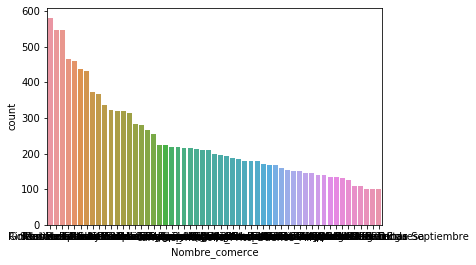

In [67]:
#Graficas
res= data_clean2.groupBy('Nombre_comerce').count().orderBy('count',ascending=False)
red=res.toPandas()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ax=sns.barplot(x="Nombre_comerce", y="count", data=red)



# 3. FEature Engineering: Tansforma pelicula a numero



In [0]:
# Importando el codifocador
from pyspark.ml.feature import StringIndexer,IndexToString

In [0]:
# Configurando la Numerzación los nombres de los comercios
# title_new = La codificación de las peliculas
stringIndexer2 = StringIndexer(inputCol="Nombre_comerce", outputCol="Nombre_comerce_new")

In [0]:
#Aplicando la numerización decomercio
model2 = stringIndexer2.fit(data_clean2)

In [0]:
#Creando un nuevo Dataframe con el indexado creado
indexed2 = model2.transform(data_clean2)

In [80]:
#Revision de los indices
indexed2.show(10)

+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+------------------+
|userID|userID_cod|placeID|      Nombre_comerce|       Distrito|rating|food_rating|service_rating|rating_total|Nombre_comerce_new|
+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+------------------+
| U1068|         2| 135104|                vips|              0|     1|          1|             2|           4|              21.0|
| U1068|         2| 132740|Carreton de Flaut...|Ciudad Victoria|     0|          0|             0|           0|              17.0|
| U1068|         2| 132663|           tacos abi|       victoria|     1|          1|             1|           3|              27.0|
| U1068|         2| 132732|  Taqueria EL amigo |    Cd Victoria|     0|          0|             0|           0|              22.0|
| U1068|         2| 132630|          palomo tec|       victoria|     1|          1|

In [81]:
#Numero de veces que comercio ha aparecido
indexed2.groupBy('Nombre_comerce_new').count().orderBy('count',ascending=False).show(10,False)

+------------------+-----+
|Nombre_comerce_new|count|
+------------------+-----+
|0.0               |581  |
|1.0               |548  |
|2.0               |547  |
|3.0               |467  |
|4.0               |460  |
|5.0               |438  |
|6.0               |432  |
|7.0               |373  |
|8.0               |367  |
|9.0               |338  |
+------------------+-----+
only showing top 10 rows



# 4. Dividiendo la data en muestra de entrenamiento y validacion


In [0]:
#4.1  Data de entrenamiento y validacion
train,test=indexed2.randomSplit([0.75,0.25],seed=1234)

In [83]:
# Nro de entrenamiento
train.count()

9863

In [84]:
# Nro de Validacion
test.count()

3256

# 5. Entrenando el Modelo


In [0]:
#Importando el modelo Recomendador ALS
from pyspark.sql.functions import *
from pyspark.ml.recommendation import ALS


In [0]:
#Configuracion del Entrenamiento del modelo Recomendador usando la muetsra de entrenamiento
rec=ALS(maxIter=10,regParam=0.01,userCol='userID_cod',itemCol='Nombre_comerce_new',ratingCol='rating_total',nonnegative=True,coldStartStrategy="drop",implicitPrefs=False,seed=1234)

# maxIter: El maximo de iteraciones
# regParam: Parametro de REgularización
# nonnegative: Especificar si se utiliza una restriccion negativa en los Minimos cuadrados
# coldStartStrategy: Parametro que elimina cualquier cliente que no tenga informacion
# implicitPrefs: Si es implicito hace referencia a feedback no registrado voluntariamente por el cliente

In [0]:
#Entrenando el modelo
rec_model=rec.fit(train)

In [0]:
#Haciendo las predicciones en la data de test 
predicted_ratings=rec_model.transform(test)

In [155]:
#Revisando los pronostico
predicted_ratings.printSchema()

root
 |-- userID: string (nullable = true)
 |-- userID_cod: integer (nullable = true)
 |-- placeID: integer (nullable = true)
 |-- Nombre_comerce: string (nullable = true)
 |-- Distrito: string (nullable = true)
 |-- rating: integer (nullable = true)
 |-- food_rating: integer (nullable = true)
 |-- service_rating: integer (nullable = true)
 |-- rating_total: integer (nullable = true)
 |-- Nombre_comerce_new: double (nullable = false)
 |-- prediction: float (nullable = false)



In [156]:
# Revision rapida de los pronosticos
predicted_ratings.orderBy(rand()).show(10)

+------+----------+-------+--------------------+-----------+------+-----------+--------------+------------+------------------+----------+
|userID|userID_cod|placeID|      Nombre_comerce|   Distrito|rating|food_rating|service_rating|rating_total|Nombre_comerce_new|prediction|
+------+----------+-------+--------------------+-----------+------+-----------+--------------+------------+------------------+----------+
| U1043|       137| 132630|          palomo tec|   victoria|     1|          1|             1|           3|              34.0| 3.0679202|
| U1058|       125| 135043|       pizza clasica|    Soledad|     1|          2|             2|           5|               8.0| 4.9758883|
| U1082|         9| 132630|          palomo tec|   victoria|     1|          1|             1|           3|              34.0| 2.9588444|
| U1082|         9| 132594|tacos de barbacoa...|          0|     0|          0|             0|           0|              42.0|       0.0|
| U1072|        27| 135088|   Cafe

In [0]:
# Generando los top 10 peliculas sugeridas por cada cliente
userRecs = rec_model.recommendForAllUsers(10)

In [158]:
userRecs.show(5,False)

+----------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|userID_cod|recommendations                                                                                                                                                      |
+----------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|31        |[[29, 5.0049286], [47, 4.994557], [50, 4.521358], [6, 4.4449306], [3, 4.277436], [16, 3.9851758], [49, 3.9695992], [11, 3.6648827], [32, 3.5985832], [41, 3.5954194]]|
|85        |[[9, 7.59154], [33, 6.5666656], [45, 6.143962], [28, 6.0632052], [19, 5.96976], [25, 5.8097057], [52, 5.4136877], [2, 4.9398146], [8, 4.793965], [34, 4.648533]]     |
|137       |[[6, 7.335392], [11, 5.4964743], [1, 5.286109], [31, 5.1799607], [50, 5.023314], [3, 4.452150

# 5. Evaluación del poder predictivo del modelo


In [159]:
# Creando la columna diferencia del pronostico
predicted_ratings_witherr=predicted_ratings.withColumn('err',abs(predicted_ratings.prediction - predicted_ratings.rating))

predicted_ratings_witherr.show()

+------+----------+-------+----------------+----------+------+-----------+--------------+------------+------------------+----------+---------+
|userID|userID_cod|placeID|  Nombre_comerce|  Distrito|rating|food_rating|service_rating|rating_total|Nombre_comerce_new|prediction|      err|
+------+----------+-------+----------------+----------+------+-----------+--------------+------------+------------------+----------+---------+
| U1117|        31| 135018|El Oceano Dorado|Cuernavaca|     1|          1|             1|           3|              31.0| 3.0022976|2.0022976|
| U1117|        31| 135018|El Oceano Dorado|Cuernavaca|     1|          1|             1|           3|              31.0| 3.0022976|2.0022976|
| U1117|        31| 135018|El Oceano Dorado|Cuernavaca|     1|          1|             1|           3|              31.0| 3.0022976|2.0022976|
| U1117|        31| 135018|El Oceano Dorado|Cuernavaca|     1|          1|             1|           3|              31.0| 3.0022976|2.0022976|

In [160]:
# Distribución de las valoraciones
predicted_ratings.groupBy('rating_total').count().orderBy('rating_total',ascending=True).show()

+------------+-----+
|rating_total|count|
+------------+-----+
|           0|  588|
|           1|   88|
|           2|  221|
|           3|  584|
|           4|  460|
|           5|  387|
|           6|  928|
+------------+-----+



In [161]:
# Error promedio por rating de valoracion
predicted_ratings_witherr.groupBy('rating_total').agg({'err':'mean'}).orderBy('rating_total',ascending=True).show()

+------------+-------------------+
|rating_total|           avg(err)|
+------------+-------------------+
|           0|0.04206375430039523|
|           1| 0.7581957985054363|
|           2| 1.1649056807902065|
|           3| 1.9708965694251126|
|           4| 2.8259762131649513|
|           5| 3.2504647979440615|
|           6| 3.9896978329995583|
+------------+-------------------+



In [162]:
# Error promedio por rating de valoracion
predicted_ratings_witherr.groupBy('rating_total').agg({'err':'std'}).orderBy('rating_total',ascending=True).show()

+------------+--------------------+
|rating_total|         stddev(err)|
+------------+--------------------+
|           0| 0.05818603571964522|
|           1| 0.43536056954824914|
|           2|  0.4913301440175618|
|           3|  0.1786968924779278|
|           4|  0.4345769759537637|
|           5| 0.43754517607085286|
|           6|0.030965249278859946|
+------------+--------------------+



In [0]:
#Importando el evaluador de Regresion RMSE 
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
#Evluando la presición del pronostico
evaluator=RegressionEvaluator(metricName='rmse',predictionCol='prediction',labelCol='rating_total')

In [0]:
#Evluando el error de pronostico global
rmse=evaluator.evaluate(predicted_ratings)

In [166]:
#Imprimiento el error
print(rmse)

0.038728838847086285


# 6. Recomendandor de peliculas, ya listo!

In [0]:
#Listado de comercios unicas
unique_movies=indexed2.select('Nombre_comerce_new').distinct()

In [168]:
#Total de peliculas
unique_movies.count()

55

In [169]:
unique_movies.show(10,False)

+------------------+
|Nombre_comerce_new|
+------------------+
|8.0               |
|0.0               |
|7.0               |
|49.0              |
|29.0              |
|47.0              |
|42.0              |
|44.0              |
|35.0              |
|18.0              |
+------------------+
only showing top 10 rows



In [0]:
#Asignando un alias {a} la lista unica de peliculas
a = unique_movies.alias('a')

In [171]:
# Eligiendo un cliente
user_id=25

# Creando una tabla que contiene una pelicula por usuario
watched_movies=indexed2.filter(indexed2['userID_cod'] == user_id).select('Nombre_comerce_new').distinct()

#Numero de peliculas ya evaluadas 
watched_movies.count()

9

In [172]:
a.show()

+------------------+
|Nombre_comerce_new|
+------------------+
|               8.0|
|               0.0|
|               7.0|
|              49.0|
|              29.0|
|              47.0|
|              42.0|
|              44.0|
|              35.0|
|              18.0|
|               1.0|
|              39.0|
|              34.0|
|              37.0|
|              25.0|
|              36.0|
|              41.0|
|               4.0|
|              23.0|
|              50.0|
+------------------+
only showing top 20 rows



In [0]:
# Asignando un alias  {b} ha peliculas que el usuario ya vio de la tabla
b=watched_movies.alias('b')

In [174]:
b.show()

+------------------+
|Nombre_comerce_new|
+------------------+
|              44.0|
|              37.0|
|              11.0|
|              38.0|
|              13.0|
|               6.0|
|               5.0|
|              26.0|
|              12.0|
+------------------+



In [0]:
#Cruzando ambas tablas
total_movies = a.join(b, a.Nombre_comerce_new == b.Nombre_comerce_new,how='left')

In [176]:
total_movies.show(10,False)

+------------------+------------------+
|Nombre_comerce_new|Nombre_comerce_new|
+------------------+------------------+
|8.0               |null              |
|0.0               |null              |
|7.0               |null              |
|49.0              |null              |
|29.0              |null              |
|47.0              |null              |
|42.0              |null              |
|44.0              |44.0              |
|35.0              |null              |
|18.0              |null              |
+------------------+------------------+
only showing top 10 rows



In [0]:
# Seleccionando peliculas que el cliente aun no ha mirado
remaining_movies=total_movies.where(col("b.Nombre_comerce_new").isNull()).select(a.Nombre_comerce_new).distinct()

In [178]:
remaining_movies.show()

+------------------+
|Nombre_comerce_new|
+------------------+
|               8.0|
|               0.0|
|               7.0|
|              49.0|
|              29.0|
|              47.0|
|              42.0|
|              35.0|
|              18.0|
|               1.0|
|              39.0|
|              34.0|
|              25.0|
|              36.0|
|              41.0|
|               4.0|
|              23.0|
|              50.0|
|              45.0|
|              31.0|
+------------------+
only showing top 20 rows



In [180]:
# Numero de peliculas que los usuario aun no lo ven 
remaining_movies.count()

46

In [0]:
# Agregando una nueva columna del usuario 
remaining_movies=remaining_movies.withColumn("userID_cod",lit(int(user_id)))

In [182]:
remaining_movies.show(10,False)

+------------------+----------+
|Nombre_comerce_new|userID_cod|
+------------------+----------+
|8.0               |25        |
|0.0               |25        |
|7.0               |25        |
|49.0              |25        |
|29.0              |25        |
|47.0              |25        |
|42.0              |25        |
|35.0              |25        |
|18.0              |25        |
|1.0               |25        |
+------------------+----------+
only showing top 10 rows



In [0]:
#Configuracion del Entrenamiento del modelo Recomendador usando la muetsra de entrenamiento
rec=ALS(maxIter=10,regParam=0.01,userCol='userID_cod',itemCol='Nombre_comerce_new',ratingCol='rating_total',nonnegative=True,coldStartStrategy="drop",implicitPrefs=False,seed=1234)


In [0]:
rec_model=rec.fit(train)

In [0]:
# Haciendo la recomendacion de peliculas utilizando el modelo recomendador ALS y seleccionado solo las mejores top {n} peliculas
recommendations=rec_model.transform(remaining_movies).orderBy('prediction',ascending=False)

In [184]:
recommendations.show(5,False)

+------------------+----------+----------+
|Nombre_comerce_new|userID_cod|prediction|
+------------------+----------+----------+
|1.0               |25        |8.330903  |
|0.0               |25        |6.718669  |
|18.0              |25        |6.6202908 |
|28.0              |25        |6.4490824 |
|10.0              |25        |6.0675387 |
+------------------+----------+----------+
only showing top 5 rows



In [0]:
# Consiguiendo los de las peliculas sugeridas
movie_title = IndexToString(inputCol="Nombre_comerce_new", outputCol="Nombre_comerce",labels=model2.labels)

final_recommendations=movie_title.transform(recommendations)

In [190]:
final_recommendations.show(10,False)

+------------------+----------+----------+----------------------+
|Nombre_comerce_new|userID_cod|prediction|Nombre_comerce        |
+------------------+----------+----------+----------------------+
|1.0               |25        |8.330903  |Gordas de morales     |
|0.0               |25        |6.718669  |Rincon Huasteco       |
|18.0              |25        |6.6202908 |dairy queen           |
|28.0              |25        |6.4490824 |cafe punta del cielo  |
|10.0              |25        |6.0675387 |Gorditas Dona Tota    |
|48.0              |25        |5.4098997 |TACOS EL GUERO        |
|21.0              |25        |5.326073  |vips                  |
|23.0              |25        |4.7800174 |Hamburguesas La perica|
|50.0              |25        |4.647002  |tortas hawai          |
|40.0              |25        |4.5214405 |tacos de la estacion  |
+------------------+----------+----------+----------------------+
only showing top 10 rows



# 7. Construyendo las funcion que sugiera una pelicula recomendada segun el modelo recomendador

In [0]:
# Funcion para recomendar las top n peliculas para cualquier usuario
def top_movies(user_id,n):
    """
    This function returns the top 'n' movies that user has not seen yet but might like 
    
    """
    # Asignación de una lista de peliculas unicas a
    a = unique_movies.alias('a')
    
    # Creando otra tabla que contiene las peliculas que ya vio el usuario
    watched_movies=indexed2.filter(indexed2['userID_cod'] == user_id).select('Nombre_comerce_new')
    
    # Asignanción de tabla de peliculas b de peliculas ya vistas 
    b=watched_movies.alias('b')
    
    # Cruce de ambas tablas
    total_movies = a.join(b, a.Nombre_comerce_new == b.Nombre_comerce_new,how='left')
    
    # Seleccionando peliculas que el usuario no ha visto aun 
    remaining_movies=total_movies.where(col("b.Nombre_comerce_new").isNull()).select(a.Nombre_comerce_new).distinct()
        
    #Agregando una nueva columan del cliente  
    remaining_movies=remaining_movies.withColumn("userID_cod",lit(int(user_id)))
    
    # REalizando la recomendnado de peliculas mas adecuada utilizando el Sistema de recomendador del modelo ALS y seleccionando las mejores peliculas
    recommendations=rec_model.transform(remaining_movies).orderBy('prediction',ascending=False).limit(n)

    # Agregando los titulos de las peliculas en texto   
    movie_title = IndexToString(inputCol="Nombre_comerce_new", outputCol="Nombre_comerce",labels=model2.labels)
    final_recommendations=movie_title.transform(recommendations)
    
    # Entregando los titutlos recomendado por usuario
    return final_recommendations.show(n,False)


In [192]:
# REvision del clientes y las 10 peliculas sugeridas para el cliente
top_movies(25,10)

+------------------+----------+----------+----------------------+
|Nombre_comerce_new|userID_cod|prediction|Nombre_comerce        |
+------------------+----------+----------+----------------------+
|1.0               |25        |8.330903  |Gordas de morales     |
|0.0               |25        |6.718669  |Rincon Huasteco       |
|18.0              |25        |6.6202908 |dairy queen           |
|28.0              |25        |6.4490824 |cafe punta del cielo  |
|10.0              |25        |6.0675387 |Gorditas Dona Tota    |
|48.0              |25        |5.4098997 |TACOS EL GUERO        |
|21.0              |25        |5.326073  |vips                  |
|23.0              |25        |4.7800174 |Hamburguesas La perica|
|50.0              |25        |4.647002  |tortas hawai          |
|40.0              |25        |4.5214405 |tacos de la estacion  |
+------------------+----------+----------+----------------------+



# Mejores restaurantes para clientes mas frecuentes

In [195]:
#Revision del primer  cliente frecuente y las 3 restaurantes sugeridas para el cliente
top_movies(25,3)

+------------------+----------+----------+-----------------+
|Nombre_comerce_new|userID_cod|prediction|Nombre_comerce   |
+------------------+----------+----------+-----------------+
|1.0               |25        |8.330903  |Gordas de morales|
|0.0               |25        |6.718669  |Rincon Huasteco  |
|18.0              |25        |6.6202908 |dairy queen      |
+------------------+----------+----------+-----------------+



In [196]:
 #Revision del segundo  cliente frecuente y las 3 restaurantes sugeridas para el cliente
top_movies(9,3)

+------------------+----------+----------+-------------------------------+
|Nombre_comerce_new|userID_cod|prediction|Nombre_comerce                 |
+------------------+----------+----------+-------------------------------+
|52.0              |9         |3.0650146 |la perica hamburguesa          |
|9.0               |9         |3.0352867 |Restaurante la Estrella de Dima|
|8.0               |9         |2.4274547 |pizza clasica                  |
+------------------+----------+----------+-------------------------------+



In [197]:
#Revision del tercer  cliente frecuente y las 3 restaurantes sugeridas para el cliente
top_movies(19,3)

+------------------+----------+----------+-------------------------------------+
|Nombre_comerce_new|userID_cod|prediction|Nombre_comerce                       |
+------------------+----------+----------+-------------------------------------+
|36.0              |19        |8.112806  |carnitas mata calle Emilio Portes Gil|
|7.0               |19        |8.101804  |Little Cesarz                        |
|49.0              |19        |7.5440187 |churchs                              |
+------------------+----------+----------+-------------------------------------+



# Mejores restaurantes para clientes menos frecuentes

In [198]:
#Revision del primer  cliente menos frecuente y las 3 restaurantes sugeridas para el cliente
top_movies(128,3)

+------------------+----------+----------+-------------------------------------+
|Nombre_comerce_new|userID_cod|prediction|Nombre_comerce                       |
+------------------+----------+----------+-------------------------------------+
|28.0              |128       |8.154572  |cafe punta del cielo                 |
|1.0               |128       |7.245825  |Gordas de morales                    |
|36.0              |128       |6.4824853 |carnitas mata calle Emilio Portes Gil|
+------------------+----------+----------+-------------------------------------+



In [199]:
#Revision del primer  cliente menos frecuente y las 3 restaurantes sugeridas para el cliente
top_movies(70,3)

+------------------+----------+----------+----------------+
|Nombre_comerce_new|userID_cod|prediction|Nombre_comerce  |
+------------------+----------+----------+----------------+
|31.0              |70        |0.0       |El Oceano Dorado|
|53.0              |70        |0.0       |cafe ambar      |
|34.0              |70        |0.0       |palomo tec      |
+------------------+----------+----------+----------------+



In [200]:
#Revision del primer  cliente menos frecuente y las 3 restaurantes sugeridas para el cliente
top_movies(118,3)

+------------------+----------+----------+-------------------------------------+
|Nombre_comerce_new|userID_cod|prediction|Nombre_comerce                       |
+------------------+----------+----------+-------------------------------------+
|28.0              |118       |1.3590955 |cafe punta del cielo                 |
|1.0               |118       |1.2076374 |Gordas de morales                    |
|36.0              |118       |1.0804143 |carnitas mata calle Emilio Portes Gil|
+------------------+----------+----------+-------------------------------------+

